# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_and_study = pd.merge(mouse_metadata, study_results, how="inner")


# Display the data table for preview
mouse_and_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [18]:
# Checking the number of mice.
mice_count= mouse_and_study["Mouse ID"].unique()
total_mice_count=len(mice_count)
total_mice_count

249

In [19]:
# Our data should be uniquely identified by Mouse ID and Timepoint

#Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_ID = mouse_and_study.loc[mouse_and_study.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mice_ID

  

array(['g989'], dtype=object)

In [20]:
# Optional: Get all the data for the duplicate mouse ID. 


In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_and_study2= mouse_and_study.drop_duplicates()
mouse_and_study2.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [22]:
# Checking the number of mice in the clean DataFrame.
mice_count2=mouse_and_study2['Mouse ID'].unique()
total_mice= len(mice_count2)
total_mice


249

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = mouse_and_study2['Tumor Volume (mm3)'].groupby(mouse_and_study2['Drug Regimen']).mean()
median = mouse_and_study2['Tumor Volume (mm3)'].groupby(mouse_and_study2['Drug Regimen']).median()
var = mouse_and_study2['Tumor Volume (mm3)'].groupby(mouse_and_study2['Drug Regimen']).var()
std = mouse_and_study2['Tumor Volume (mm3)'].groupby(mouse_and_study2['Drug Regimen']).std()
sem = mouse_and_study2['Tumor Volume (mm3)'].groupby(mouse_and_study2['Drug Regimen']).sem()

summary_Statistics = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})

summary_Statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats=mouse_and_study2.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(['mean','median','var','std','sem'])
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.368318  50.909965  42.278090  6.502160  0.514041
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

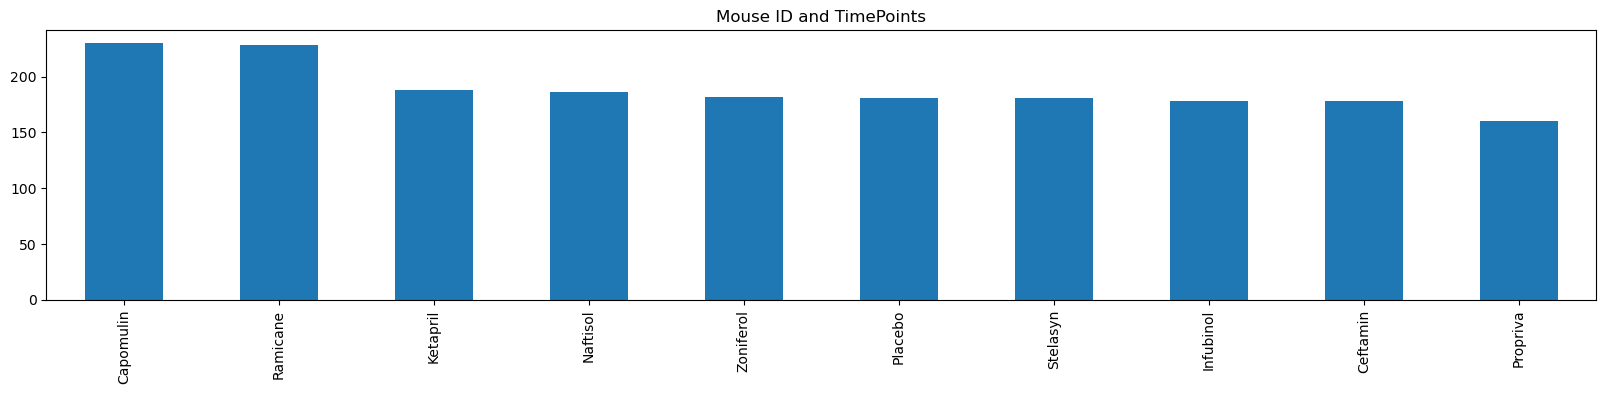

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_clean= mouse_and_study2['Drug Regimen'].value_counts()
mouse_clean.plot(kind="bar", figsize=(20,3.5))
plt.title("Mouse ID and TimePoints")
plt.show()

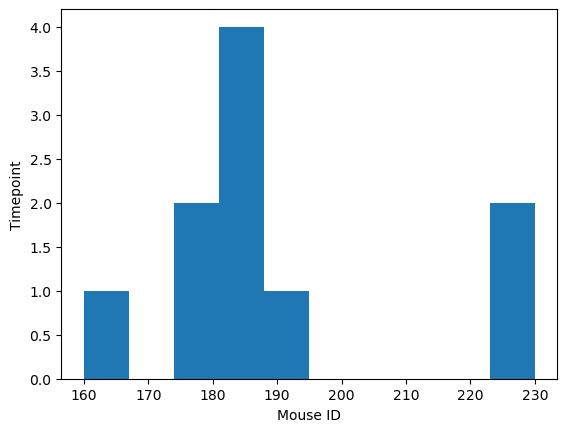

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.hist(mouse_clean)
plt.xlabel('Mouse ID')
plt.ylabel('Timepoint')
plt.show()

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
drug_count_gender= mouse_and_study2.groupby(['Sex'])
drug_count_genders= mouse_and_study2['Sex'].value_counts()




In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = mouse_and_study2.loc[mouse_and_study2["Drug Regimen"] == "Capomulin",:]
Ramicane_df = mouse_and_study2.loc[mouse_and_study2["Drug Regimen"] == "Ramicane",:]
Infubinol_df = mouse_and_study2.loc[mouse_and_study2["Drug Regimen"] == "Infubinol",:]
Ceftamin_df = mouse_and_study2.loc[mouse_and_study2["Drug Regimen"] == "Ceftamin",:]
# Start by getting the last (greatest) timepoint for each mouse
mouse_final= mouse_and_study2.groupby('Mouse ID').max()["Timepoint"]
mouse_volume= pd.DataFrame(mouse_final)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_together=pd.merge(mouse_volume, mouse_and_study2, on=("Mouse ID", "Timepoint"), how="inner")
mouse_together.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [31]:
# Put treatments into a list for for loop (and later for plot labels)
mouse_tumor=mouse_together["Tumor Volume (mm3)"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=["Mouse ID"]
medicine =0
final_box=[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = mouse_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in tumor_vol_data:
    quartiles = mouse_tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # add subset 
lower_bounds = lowerq - (1.5*iqr)
upper_bounds = upperq + (1.5*iqr)
 # Determine outliers using upper and lower bounds
if medicine==0:
    print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bounds} could be {drug} outliers.")
    print(f"Values above {upper_bounds} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    medicine+=1
    
   


------------------------------------------------------------
The lower quartile of Mouse ID treatments is: 45.93471217
The upper quartile of Mouse ID treatments is: 64.95756185
The interquartile range of Mouse ID treatments is: 19.022849680000007
Values below 17.400437649999986 could be Mouse ID outliers.
Values above 93.49183637000002 could be Mouse ID outliers.
------------------------------------------------------------


ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (1).

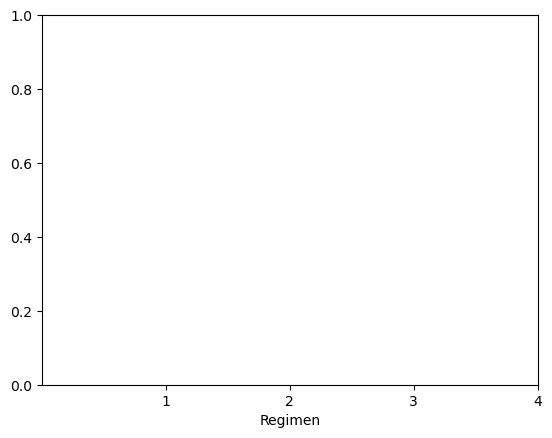

In [34]:
for drug in tumor_vol_data:
    final_box.append(mouse_volume)
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig = plt.figure()
plt.xlabel("Regimen")
plt.xticks([1,2,3,4], tumor_vol_data, rotation=45)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")

plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

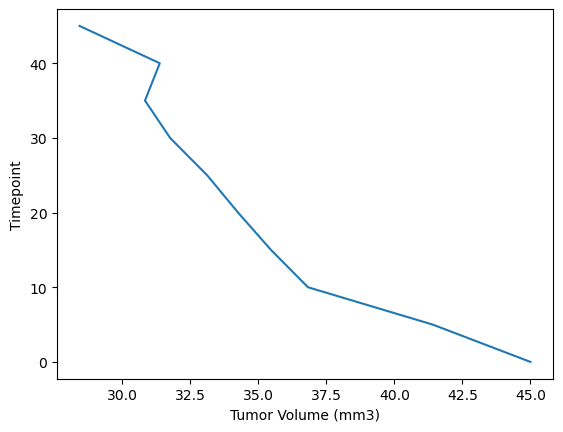

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_plot=Capomulin_df.loc[Capomulin_df['Mouse ID']== 'm601',:]
line_plot.head()
x_axis=line_plot['Tumor Volume (mm3)']
y_axis=line_plot['Timepoint']
plt.plot(x_axis,y_axis)
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Timepoint')
plt.show

/var/folders/mx/sjsv2r8j6kg5r6vd010k015m0000gn/T/ipykernel_15093/586211971.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  scatter_plot=Capomulin_df.groupby(Capomulin_df['Mouse ID']).mean()


<function matplotlib.pyplot.show(close=None, block=None)>

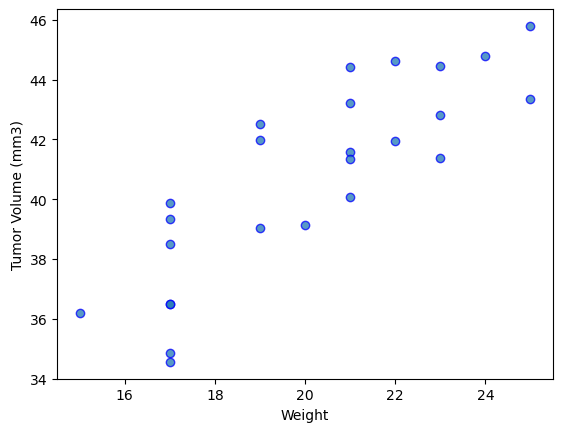

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_plot=Capomulin_df.groupby(Capomulin_df['Mouse ID']).mean()
scatter_plot.head()
x_axis=scatter_plot['Weight (g)']
y_axis=scatter_plot['Tumor Volume (mm3)']
plt.scatter(x_axis,y_axis, marker="o", edgecolors="blue",alpha=0.75)

plt.xlabel('Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.show

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
correlation=st.pearsonr(mouse_and_study2['Weight (g)'],mouse_and_study2['Tumor Volume (mm3)'])
print(correlation)
linregress(x_axis,y_axis)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
slope
intercept
y=  slope*1+ intercept
y
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


PearsonRResult(statistic=0.5875857888686031, pvalue=4.7981687564721e-176)


/var/folders/mx/sjsv2r8j6kg5r6vd010k015m0000gn/T/ipykernel_15093/283325053.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  scatter_plot=Capomulin_df.groupby(Capomulin_df['Mouse ID']).mean()


<function matplotlib.pyplot.show(close=None, block=None)>

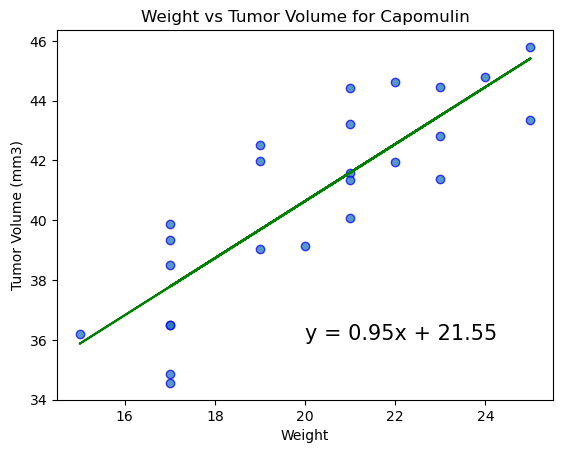

In [ ]:
scatter_plot=Capomulin_df.groupby(Capomulin_df['Mouse ID']).mean()
plt.annotate(line_eq, (20,36),fontsize=15)
plt.plot(x_axis,regress_values, color="green")
x_axis=scatter_plot['Weight (g)']
y_axis=scatter_plot['Tumor Volume (mm3)']
plt.scatter(x_axis,y_axis, marker="o", edgecolors="blue",alpha=0.75)
plt.title("Weight vs Tumor Volume for Capomulin")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.show